In [31]:
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [34]:
X, y = sklearn.datasets.make_moons(500, noise=0.30)

In [35]:
t = X.shape
print(t)
print(y.shape[0])

def plotData(X,y):
    # Create new figure
    
    # =======================
    pos = y==1
    neg = y==0
    
    plt.plot(X[pos,0],X[pos,1],'ko')
    plt.plot(X[neg,0],X[neg,1],'r*')
    
    # =======================

(500, 2)
500


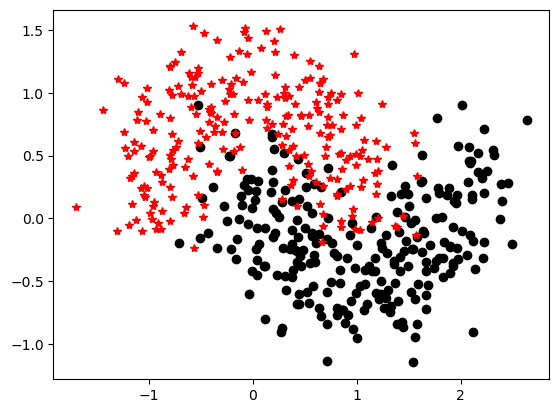

In [36]:
plotData(X,y)

In [37]:
def sigmoid(Z):
    return 1 / ( 1 + np.exp(-Z))

In [38]:
def relu(Z):
    return np.maximum(0, Z)

def prime_relu(Z):
    return np.heaviside(Z, 0)

In [39]:
def forward_propagation(X, W1, b1, W2, b2):

    forward_params = {}
    Z1 = np.dot(W1, X.T) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    forward_params = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2,}
    return forward_params

In [40]:

def loss_function(A2, y):
    data_size = y.shape[1]

    cost = (-1 / data_size) * (np.dot(y, np.log(A2).T) + np.dot(1 - y, np.log(1 - A2).T))

    return cost

In [41]:
def backward_propagation(forward_params, X, Y):

    A2 = forward_params["A2"]

    Z2 = forward_params["Z2"]

    A1 = forward_params["A1"]

    Z1 = forward_params["Z1"]



    data_size = Y.shape[1]



    dZ2 = A2 - Y

    dW2 = np.dot(dZ2, A1.T) / data_size



    db2 = np.sum(dZ2, axis=1) / data_size



    dZ1 = np.dot(dW2.T, dZ2) * prime_relu(Z1)

    dW1 = np.dot(dZ1, X) / data_size

    db1 = np.sum(dZ1, axis=1) / data_size



    db1 = np.reshape(db1, (db1.shape[0], 1))



    grads = {"dZ2": dZ2,"dW2": dW2,"db2": db2,"dZ1": dZ1,"dW1": dW1,"db1": db1}



    return grads

In [95]:
def one_hidden_layer_model(X, y, epochs=1000, learning_rate=0.003):

    np.random.seed(0)

    input_size = X_train.shape[1]

    output_size = 1

    hidden_layer_nodes = 10



    W1 = np.random.randn(hidden_layer_nodes, input_size) / np.sqrt(input_size)

    b1 = np.zeros((hidden_layer_nodes, 1))

    W2 = np.random.randn(output_size, hidden_layer_nodes) / np.sqrt(hidden_layer_nodes)

    b2 = np.zeros((output_size, 1))



    loss_history = []



    for i in range(epochs):

        forward_params = forward_propagation(X, W1, b1, W2, b2)

        A2 = forward_params["A2"]

        loss = loss_function(A2, y)



        grads = backward_propagation(forward_params, X, y)



        W1 -= learning_rate * grads["dW1"]



        b1 -= learning_rate * grads["db1"]



        W2 -= learning_rate * grads["dW2"]

        b2 -= learning_rate * grads["db2"]





        if i % 1000 == 0:

            print ("Costo e iteracion %i: %f" % (i, loss))
        loss_history.append(loss[0,0])



    return W1, b1, W2, b2,loss_history

In [96]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.20)

In [97]:
y_train = np.reshape(y_train, (1, y_train.shape[0]))

y_val = np.reshape(y_val, (1, y_val.shape[0]))


In [98]:
W1, b1, W2, b2, loss_history = one_hidden_layer_model(X_train, y_train, epochs=20000, learning_rate=0.003)

Costo e iteracion 0: 0.656005
Costo e iteracion 1000: 0.449733
Costo e iteracion 2000: 0.401216
Costo e iteracion 3000: 0.379434
Costo e iteracion 4000: 0.367511
Costo e iteracion 5000: 0.360167
Costo e iteracion 6000: 0.355289
Costo e iteracion 7000: 0.351864
Costo e iteracion 8000: 0.349362
Costo e iteracion 9000: 0.347472
Costo e iteracion 10000: 0.346006
Costo e iteracion 11000: 0.344845
Costo e iteracion 12000: 0.343909
Costo e iteracion 13000: 0.343146
Costo e iteracion 14000: 0.342514
Costo e iteracion 15000: 0.341985
Costo e iteracion 16000: 0.341536
Costo e iteracion 17000: 0.341151
Costo e iteracion 18000: 0.340817
Costo e iteracion 19000: 0.340526


In [99]:
def predict(W1, b1, W2, b2, X):

    data_size = X.shape[0]

    forward_params = forward_propagation(X, W1, b1, W2, b2)



    y_prediction = np.zeros((1, data_size))



    A2 = forward_params["A2"]
    for i in range(A2.shape[1]):

        y_prediction[0, i] = 1 if A2[0, i] > 0.5 else 0



    return y_prediction

In [100]:
train_predictions = predict(W1, b1, W2, b2, X_train)

validation_predictions = predict(W1, b1, W2, b2, X_val)



print("train accuracy: {} %".format(100 - np.mean(np.abs(train_predictions - y_train)) * 100))

print("test accuracy: {} %".format(100 - np.mean(np.abs(validation_predictions - y_val)) * 100))

train accuracy: 84.75 %
test accuracy: 83.0 %


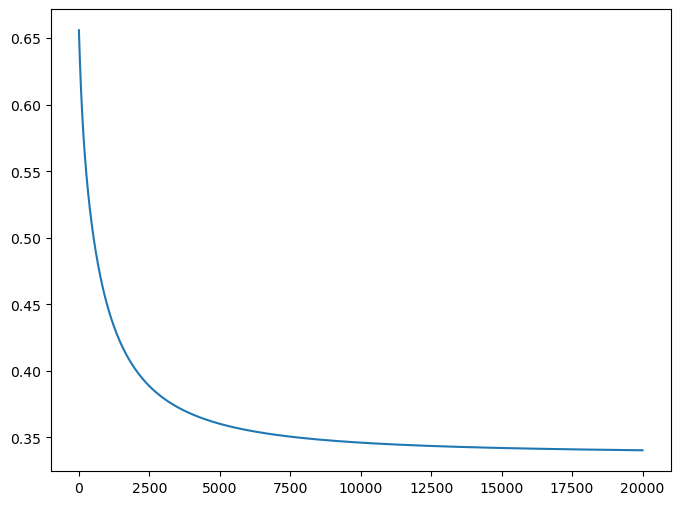

In [103]:
plt.figure(figsize=(8, 6))

x = [loss_history.index(i) for i in loss_history]
plt.plot(x, loss_history)
plt.show()

In [86]:
def make_predictions(X, W1, b1, W2, b2):

    forward_params = {}
    Z1 = np.dot(W1, X.T) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return A1,A2

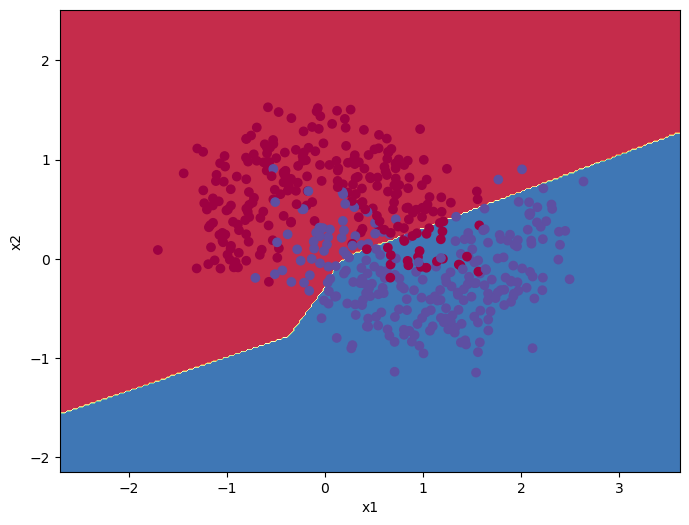

In [106]:
def plot_decision_boundary(model, X, y):

    # find the minimum and maximum values for the first
    # and second feature of the dataset

    x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02

    # generate a grid of data points between maximum and minimum feature values
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # make prediction on all points in the grid
    A1, Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # convert sigmoid outputs to binary
    Z = np.where(Z > 0.5, 1, 0)

    # plot countourf plot to fill the grid with data points
    # the colour of the data points correspond to prediction (0 or 1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)

    # plot the original scatter plot to see where the data points fall
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

plt.figure(figsize=(8, 6))
plot_decision_boundary(lambda x: make_predictions(x, W1, b1,W2, b2), X, y)